In [15]:
import numpy as np
import matplotlib.pyplot as pl
import matplotlib.style as mplstyle
import seaborn as sns
from decimal import Decimal
mplstyle.use('seaborn')
# sns.set_style("whitegrid", {'axes.grid' : False})
sns.set_style('darkgrid')
from matplotlib.colors import ListedColormap
cmap = ListedColormap(sns.cubehelix_palette(100, start=.5, rot=-.75, reverse=True))

import gbpmcplot as gbpmcplot

In [3]:
import os
cwd = os.getcwd()
foldir = 'varying_numphotons'
datadir = os.path.join(cwd, foldir) 
subfoldir = '' # f'r{scattering_degree}'
fullpath = os.path.join(datadir, subfoldir)
fullpath

'/Users/hannaharjonillo/Research/gbp_mc/varying_numphotons/'

In [4]:
def polyfit(x, y, degree):
    coeffs = np.polyfit(x, y, degree)

    # r-squared
    p = np.poly1d(coeffs)
    
    # fit values, and mean
    yhat = p(x)                         # or [p(z) for z in x]
    ybar = np.sum(y)/len(y)          # or sum(y)/len(y)
    ssreg = np.sum((yhat-ybar)**2)   # or sum([ (yihat - ybar)**2 for yihat in yhat])
    sstot = np.sum((y - ybar)**2)    # or sum([ (yi - ybar)**2 for yi in y])
    r2 = ssreg / sstot
    
    return coeffs, p, r2

In [5]:
R = []
SCATOUT = []
SCATCENTERS = []
SCAT_HISTORY = []
SCAT_PROPS = []
STOP_STEP = []
START_STEP = []
FREE_PATHS = []

scat_degree = 0
g = 0
num_trials = 5
num_photons_arr = np.logspace(3, 5, 7)

for num_photons in num_photons_arr:
    rays, scattered_out, scatterer_centers, scatter_history, scat_props, \
            start_step, stop_step, dists = gbpmcplot.get_data(num_photons=int(num_photons), num_degree=scat_degree//2,
                                                              num_steps=100, num_trials=num_trials, g=g, fullpath=fullpath)
    R.append(rays)
    SCATOUT.append(scattered_out)
    SCAT_HISTORY.append(scatterer_centers)
    SCAT_PROPS.append(scat_props)
    START_STEP.append(start_step)
    STOP_STEP.append(stop_step)
    FREE_PATHS.append(dists)

In [6]:
transverse_intensities, axial_intensities, axial_intensities_std, axial_edges, transverse_edges, h_ave, h_std = gbpmcplot.get_intensity_dists(R)
# np.savez('interpolated.npz', transverse_intensities, axial_intensities, axial_intensities_std, axial_edges, transverse_edges, h_ave, h_std)
# stuff = np.load('interpolated.npz')
# transverse_intensities = stuff['arr_0']
# axial_intensities = stuff['arr_1']
# axial_intensities_std = stuff['arr_2']
# axial_edges = stuff['arr_3']
# transverse_edges = stuff['arr_4']
# h_ave = stuff['arr_5']
# h_std = stuff['arr_6']


In [7]:
axial_intensities_std[0].shape

(200,)

/usr/local/Cellar/jupyter/1.0.0_5/libexec/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


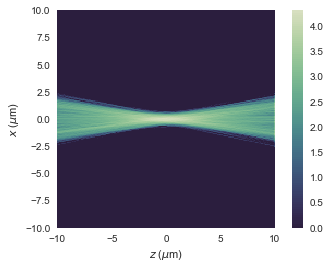

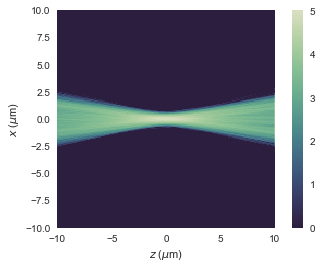

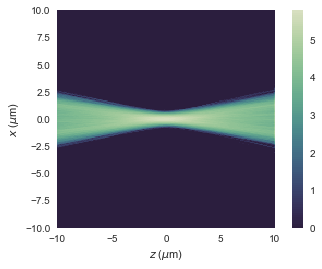

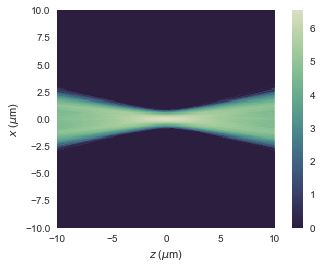

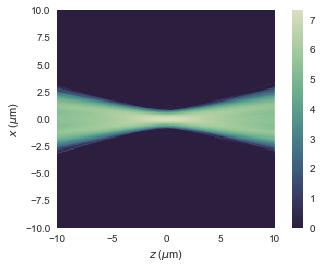

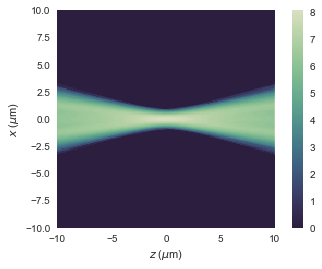

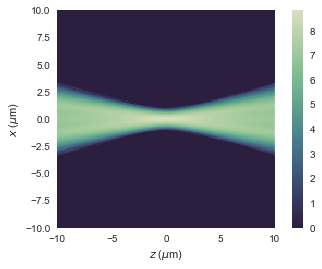

In [8]:
with sns.axes_style("white"):
    for i in range(len(num_photons_arr)):
        pl.figure()
        hist_logscale = np.log(h_ave[i])
        hist_logscale[np.isinf(hist_logscale)] = 0
        hist_logscale[np.isnan(hist_logscale)] = 0
        pl.imshow(hist_logscale, origin='lower', extent=(-10, 10, -10, 10), cmap=cmap, vmin=0)
        pl.colorbar()
    #     pl.title(f'R = {(scat_degree) * 2}')
        pl.xlabel(r'$z$ ($\mu$m)')
        pl.ylabel(r'$x$ ($\mu$m)')
    #     pl.savefig(f'intensitydist-R{scat_degree * 2}.png', dpi=300)

\begin{equation}
 \text{SNR} = \frac{P_\text{sig}}{P_\text{noise}} = \frac{\int_{z_1}^{z_2} I_\text{sig}(z) \text{d}z}{\int_{z_1}^{z_2} I_\text{noise}(z) \text{d}z}
\end{equation}

[ 2.56124969  2.44948974  2.65329983  3.2         3.13687743  2.78567766
  3.31058907  3.46410162  3.38230691  3.77359245  3.86781592  3.86781592
  4.02988834  3.96988665  3.84707681  3.92937654  4.2708313   3.84707681
  3.86781592  3.72021505  3.13687743  3.00665928  3.26190129  2.87054002
  3.79473319  4.02988834  4.66476152  5.30659966  5.15363949  5.23832034
  4.87442304  4.5607017   4.5607017   3.96988665  4.19523539  5.25357021
  6.09918027  6.40624695  5.9126982   5.88557559  6.43117408  7.08801806
  6.37495098  7.05407684  6.24179461  6.05309838  5.46260011  5.69209979
  5.77581163  5.89915248  6.46838465  6.24819974  5.35163526  4.60434577
  5.27636238  5.74804315  6.20966988  6.52993109  6.91086102  7.12741187
  8.0746517   7.8638413   8.47584804  9.94786409 11.54816003 11.88276062
 10.18626526 10.32279032 11.00181803  9.41488184  7.87400787  9.26498786
  8.9977775   8.48528137  8.81816307  9.15641851  8.7772433   6.98569968
  8.04984472  5.47722558  5.52810998  3.61109402  4

[24.10808993 19.90979658 17.8392825  14.98532616 14.91844496 15.10761397
 14.40833092 13.94274005 12.4        15.53833968 17.28583235 16.51665826
 21.59259132 20.97617696 19.00947132 18.0930926  18.85099467 19.89572818
 19.01998948 17.97108789 20.53874388 20.40196069 18.18130908 19.30181339
 19.62039755 21.60925728 21.490463   21.46997904 23.67276917 21.02760091
 17.62498227 16.21604144 17.03408348 13.93413076 15.10761397 14.66424222
 12.91510743 11.4437756   9.9919968  10.34214678 12.84678948 12.43543325
 11.26765282 11.33843023 15.05456741 15.83161394 11.16422859 15.26302722
 19.5079471  22.39106965 19.45867416 21.25464655 24.89497941 29.26021189
 34.42440994 32.6521056  22.24949438 19.86353443 14.00856881  8.97552227
  9.39361485 12.9398609  13.12402377 11.42628549 11.55162326  8.91291198
 12.25397895 17.90418945 14.4692778  14.68877122 32.32707843 33.90339216
 29.12043956 35.23293913 33.41017809 31.05221409 29.6        28.85550207
 24.35569749 26.71778434 32.83534681 27.68826466 25

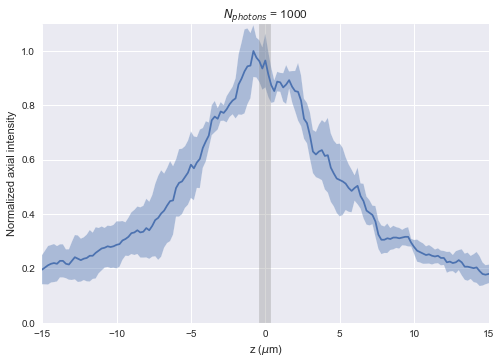

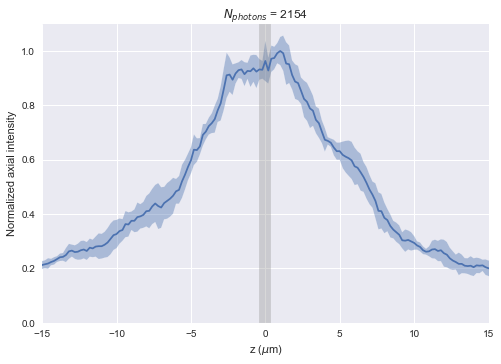

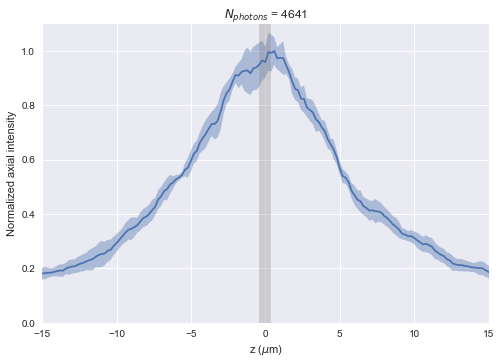

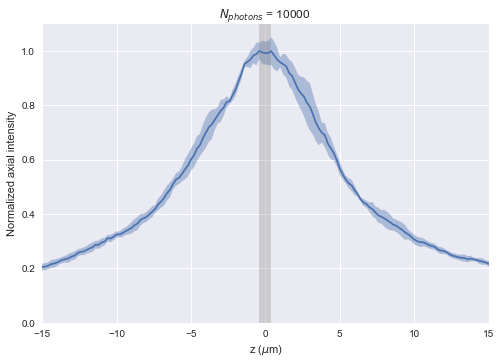

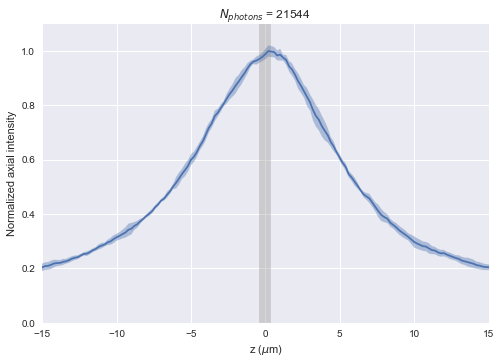

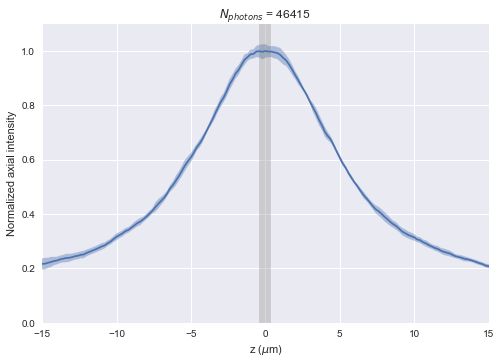

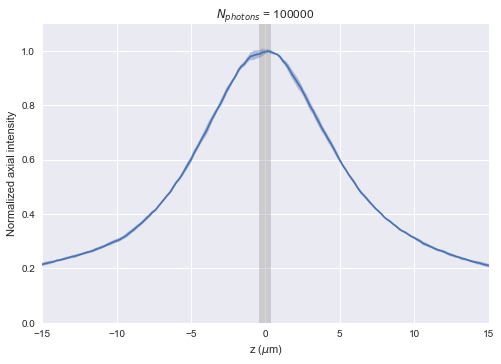

In [20]:
snr_list = []

# fig, ax = pl.subplots(1, 5, sharey=False, figsize=(25,5))
for i in range(len(num_photons_arr)):
    x = axial_edges[i][:-1]
    y = axial_intensities[i]
    noise = axial_intensities_std[i]
    print(noise)
    snr = np.sum(y) / np.sum(noise) # desired signal power divided by noise power
    snr_list.append(snr)
    
    ynorm = np.amax(y)
    y = y / ynorm # signal
    y_std = axial_intensities_std[i] / ynorm # noise
    
    pl.figure()
    pl.plot(x, y)
    pl.fill_between(x, y-y_std, y+y_std, alpha=0.4)
    pl.title(f'$N_{{photons}}$ = {int(num_photons_arr[i])}')
    pl.xlim(-15,15)
    pl.xlabel(r'z ($\mu$m)')
    pl.ylim(0, 1.1)
    
    pl.fill_between(x, 0, 1.1, where=np.abs(x)<=0.57, facecolor='gray', alpha=0.3)
    pl.ylabel('Normalized axial intensity')
    pl.savefig(f'axial_intensity-{int(num_photons_arr[i])}.png')

In [10]:
num_photons_arr

array([  1000.        ,   2154.43469003,   4641.58883361,  10000.        ,
        21544.34690032,  46415.88833613, 100000.        ])

In [11]:
snr_list_db = 10 * np.log10(np.array(snr_list))
snr_list_db

array([ 7.73271932, 10.22951513, 11.19391432, 12.74653557, 14.50508703,
       15.11255644, 17.58132842])

[ 4.56675885 -5.53822738] 0.9838532566270263
[5.932966993769736, 10.542691863799288, 13.164107864397755, 18.821470725399934, 28.216861269091552, 32.45305934677496, 57.29712651137045]


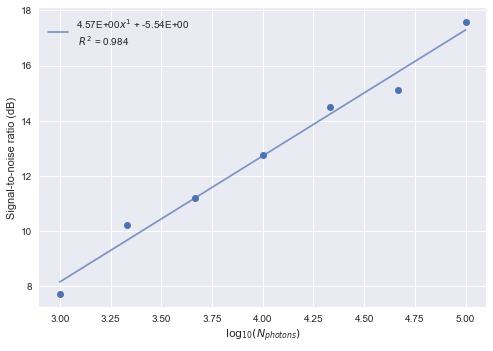

In [23]:
ax = pl.subplot()
# ax.set_xscale("log", nonposx='clip')
# ax.set_yscale("log", nonposy='clip')

# num_photons_arr2 = np.insert(num_photons_arr, 0, 0)
# snr_list = np.insert(np.array(snr_list_db), 0, 0)
# print(snr_list)

degree = 1
coeffs, p, r2 = polyfit(np.log10(num_photons_arr), snr_list_db, degree=degree)
print(coeffs, r2)

xp = np.linspace(3,5,100)
label_eq = ''
for i in range(0, len(coeffs)):
    label_eq += f'{coeffs[i]:.2E}'
    if i < len(coeffs)-1:
        label_eq += f'$x^{len(coeffs)-1-i}$ + '
label_eq += f'\n $R^2$ = {r2:.3f}'

pl.plot(np.log10(num_photons_arr), snr_list_db, 'o', color='C0')
pl.plot(xp, p(xp), label=label_eq, color='C0', alpha=0.7)
pl.xlabel('$\log_{10} (N_{photons})$')
pl.ylabel('Signal-to-noise ratio (dB)')
pl.legend(loc='best')
# pl.title(f'Signal to noise ratio vs. Number of photons launched for $N_{{scatterers}} = 2904$')

print(snr_list)
pl.savefig('snrvsnumphotons-R0.png', dpi=300)

In [12]:
# make a cost function